In [1]:
import pandas as pd
import json
import re
from collections import Counter, OrderedDict

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
import string
from nltk.tokenize import RegexpTokenizer

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# 100 random Amazon reviews of books only 
with open('first_hundread.txt',encoding='utf-8') as f:
    amazonRev = [json.loads(line) for line in f]

In [5]:
# Take only review text
reviewText = [d['reviewText'] for d in amazonRev]
# Flat list
flatList = " ".join(reviewText)

In [6]:
# Function to clean text
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ') 
    return text

In [7]:
def word_count(lst):    
    clean = clean_text(lst)
    tokens = nltk.word_tokenize(clean)
    filtered_words = [word for word in tokens if word not in stopwords.words('english')]
    x = Counter(filtered_words)
    myDict = OrderedDict(x.most_common())
    return myDict

In [8]:
reviewText_wc = word_count(flatList)
def unpackDict(d):
    myList = list(d.items())[:10]
    x, y = zip(*myList)
    return x, y

<BarContainer object of 10 artists>

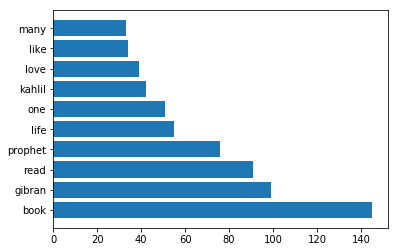

In [9]:
x, y = unpackDict(reviewText_wc)
plt.barh(x, y)